In [1]:
initial_dna_sequence = [
    'A', 'ALPHA',
    'B', 'BETA',
    'C', 'GAMMA',
    'D', 'DELTA',
    'E', 'EPSILON',
    'F', 'ZETA',
    'G', 'ETA',
    'H', 'THETA',
    'I', 'IOTA',
    'J', 'KAPPA',
    'K', 'LAMBDA',
    'L', 'MU',
    'M', 'NU',
    'N', 'XI',
    'O', 'OMICRON',
    'P', 'PI',
    'Q', 'RHO',
    'R', 'SIGMA',
    'S', 'TAU',
    'T', 'UPSILON',
    'U', 'PHI',
    'V', 'CHI',
    'W', 'PSI',
    'X', 'OMEGA',
    'DELTA', 'D'
]


In [ ]:
initial_dna_sequence= [
    'A', 'ALPHA', 'BETA', 'B',
    'A', 'ALPHA', 'BETA', 'B',
    'A', 'ALPHA', 'BETA', 'B',
    'A', 'ALPHA', 'BETA', 'B',
    'A', 'ALPHA', 'BETA', 'B'
]





In [35]:
initial_dna_sequence=[
'1', 'A', 'ALPHA',
'2', 'BETA', 'B',
'3', 'A', 'ALPHA',
'4', 'BETA', 'B',
'5', 'A', 'ALPHA',
'6', 'BETA', 'B',
'7', 'A', 'ALPHA',
'8', 'BETA', 'B',
'9', 'A', 'ALPHA',
'10', 'BETA', 'B',
'11']





In [68]:
initial_dna_sequence=[
'1', 'A', 'ALPHA',
'2', 'ALPHA', 'A',
'3','A','ALPHA',
'4','ALPHA','A',
'5','A','ALPHA',
'6','ALPHA','A',
'7','A','ALPHA',
'8','ALPHA','A',
'9','A','ALPHA',
'10','ALPHA','A',
'11']

In [69]:
# -*- coding: utf-8 -*-

class CompositeElement:
    def __init__(self, name):
        self.name = name
        self._composite = None
    
    def composite(self):
        return self._composite
    
    def set_composite(self, other):
        self._composite = other

class CompositeMapping:
    def __init__(self):
        self.elements = {}
    
    def add_pair(self, element1, element2):
        # Create CompositeElement instances if they don't exist
        if element1 not in self.elements:
            self.elements[element1] = CompositeElement(element1)
        if element2 not in self.elements:
            self.elements[element2] = CompositeElement(element2)
        
        # Set up the composite relationship
        self.elements[element1].set_composite(self.elements[element2])
        self.elements[element2].set_composite(self.elements[element1])
    
    def get_element(self, name):
        return self.elements.get(name)





def create_mapping():# Check encoding first
    
    # Create a composite mapping
    composite_mapping = CompositeMapping()
    
    # Define all the letter sets
    latin_upper = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    latin_lower = 'abcdefghijklmnopqrstuvwxyz'

    
    # Define Latin names
    latin_names_upper = [
        'ALPHA', 'BETA', 'GAMMA', 'DELTA', 'EPSILON', 'ZETA', 'ETA', 'THETA',
        'IOTA', 'KAPPA', 'LAMBDA', 'MU', 'NU', 'XI', 'OMICRON', 'PI', 'RHO',
        'SIGMA', 'TAU', 'UPSILON', 'PHI', 'CHI', 'PSI', 'OMEGA'
    ]
    latin_names_lower = [name.lower() for name in latin_names_upper]

    
    
    # 1. Latin uppercase to uppercase prime
    for letter in latin_upper:
        composite_mapping.add_pair(letter, f"{letter}_prime")
    
    # 2. Latin lowercase to lowercase prime
    for letter in latin_lower:
        composite_mapping.add_pair(letter, f"{letter}_prime")
    
    
    # 5. Latin names uppercase to uppercase prime
    for name in latin_names_upper:
        composite_mapping.add_pair(name, f"{name}_prime")
    
    # 6. Latin names lowercase to lowercase prime
    for name in latin_names_lower:
        composite_mapping.add_pair(name, f"{name}_prime")

    # 7. Numbers to uppercase prime
    for number in range(1, 12):
        composite_mapping.add_pair(str(number), f"{str(number)}_prime")

    return composite_mapping


    
composite_mapping=create_mapping()



In [70]:
A=CompositeElement("A")
A.set_composite(CompositeElement("A_prime"))

print(A._composite.name)






A_prime


In [71]:
def inverse_composite(sequence):
    inverse_composite=sequence[::-1]
    for i in range(len(inverse_composite)):
        inverse_composite[i]=composite_mapping.elements[inverse_composite[i]]._composite.name
    return inverse_composite


In [72]:
print(inverse_composite(['A_prime','B','C_prime','gamma']))

['gamma_prime', 'C', 'B_prime', 'A']


In [73]:

def detect_forward_sites(DNA,site):
    site_length = len(site)
    start_positions = []
    end_positions = []
    
    # Slide through the DNA looking for matches
    for i in range(len(DNA) - site_length + 1):
        # Check if current window matches the site
        if DNA[i:i+site_length] == site:
            start_positions.append(i)#computer positions
    
    return start_positions


In [74]:

def detect_backward_sites(DNA,site):
    site_length = len(site)
    start_positions = []
    end_positions = []
    
    # Slide through the DNA looking for matches
    for i in range(len(DNA) - site_length + 1):
        # Check if current window matches the site
        if DNA[i:i+site_length] == site[::-1]:
            start_positions.append(i)#computer positions
    
    return start_positions

#ALL positions recorded in natural counting, not computer indices, delete and inverts [site_1,site_2] inclusive
def delete_between(DNA,site_1,site_2):
    return None #DNA[:site_1-1]+DNA[site_2:]  

def invert_between(DNA,site_1,site_2):
    return DNA[:site_1-1]+inverse_composite(DNA[site_1-1:site_2])+DNA[site_2:] 



In [75]:
invert_between(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'],2,4)

['A',
 'D_prime',
 'C_prime',
 'B_prime',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [76]:


def evaluate_colour_CRE(DNA,choice1,choice2):

    num1, direction_1 = choice1
    num2, direction_2 = choice2
    #WLOG,make num 1 the smaller one
    if num1 > num2:
        num1, num2 = num2, num1
    
    # Determine which function to use
    
    if direction_1 == 'forward':
        if direction_1 == direction_2:
            result= 'DoNotCount'
        elif direction_1!=direction_2:
            result= invert_between(DNA,num1+1,num2+1)
    elif direction_1=='backward':
        if direction_1 == direction_2:
            result= 'DoNotCount'
        else :
            result= 'DoNotCount'

    return result








In [77]:
def probability_calculation(DNA,forward_sites,backward_sites):
    # Dictionary to store counts of each outcome
    outcome_list=[{tuple(DNA):1}]

    for _ in range(10):
        outcome_list.append({})
    recombinases_event=  0


    # Run simulations
    for stage in outcome_list:
        if recombinases_event<len(outcome_list)-1:
            recombinases_event+=1      
            for stored_result,probabilities in stage.items():
                stored_result=list(stored_result)
                num_arrows=0
                forward_9_positions=detect_forward_sites(stored_result,forward_sites)
                backward_6_positions=detect_backward_sites(stored_result,backward_sites)
                # Randomly select two sites
                forward = [(num, 'forward') for num in forward_9_positions] 
                backward= [(num, 'backward') for num in backward_6_positions]
                if 1==1:#wierd logic due to historical reasons
                    
                    num_arrows=len(forward)*len(backward)
                    
                    for i in forward:
                        for j in backward:
                            choice1,choice2 = i, j
                            if choice1[0]>choice2[0]:
                                break
                            
                            output = evaluate_colour_CRE(stored_result,choice1,choice2)
                            #while output=='DoNotCount':
                            #    output=evaluate_colour_CRE(stored_result,choice1,choice2)
                            if output!='DoNotCount':
                                formatted_output = tuple(output)
                                print(formatted_output)#!!!Remove before flight  
                                if formatted_output not in outcome_list[recombinases_event]:
                                    outcome_list[recombinases_event][formatted_output] = 0
                                outcome_list[recombinases_event][formatted_output] +=2*probabilities/num_arrows
                        
        print('stage',recombinases_event,'completed')
    return outcome_list

In [78]:
data={}

outcome_lists= probability_calculation(initial_dna_sequence,['A','ALPHA'],['A','ALPHA'])


('1', 'ALPHA_prime', '2_prime', 'ALPHA_prime', 'A_prime', 'A', '3', 'A', 'ALPHA', '4', 'ALPHA', 'A', '5', 'A', 'ALPHA', '6', 'ALPHA', 'A', '7', 'A', 'ALPHA', '8', 'ALPHA', 'A', '9', 'A', 'ALPHA', '10', 'ALPHA', 'A', '11')
('1', 'ALPHA_prime', '4_prime', 'ALPHA_prime', 'A_prime', '3_prime', 'A_prime', 'ALPHA_prime', '2_prime', 'ALPHA_prime', 'A_prime', 'A', '5', 'A', 'ALPHA', '6', 'ALPHA', 'A', '7', 'A', 'ALPHA', '8', 'ALPHA', 'A', '9', 'A', 'ALPHA', '10', 'ALPHA', 'A', '11')
('1', 'ALPHA_prime', '6_prime', 'ALPHA_prime', 'A_prime', '5_prime', 'A_prime', 'ALPHA_prime', '4_prime', 'ALPHA_prime', 'A_prime', '3_prime', 'A_prime', 'ALPHA_prime', '2_prime', 'ALPHA_prime', 'A_prime', 'A', '7', 'A', 'ALPHA', '8', 'ALPHA', 'A', '9', 'A', 'ALPHA', '10', 'ALPHA', 'A', '11')
('1', 'ALPHA_prime', '8_prime', 'ALPHA_prime', 'A_prime', '7_prime', 'A_prime', 'ALPHA_prime', '6_prime', 'ALPHA_prime', 'A_prime', '5_prime', 'A_prime', 'ALPHA_prime', '4_prime', 'ALPHA_prime', 'A_prime', '3_prime', 'A_prime'

In [79]:

stored_data=(outcome_lists)

In [80]:
import matplotlib.pyplot as plt
import numpy as np





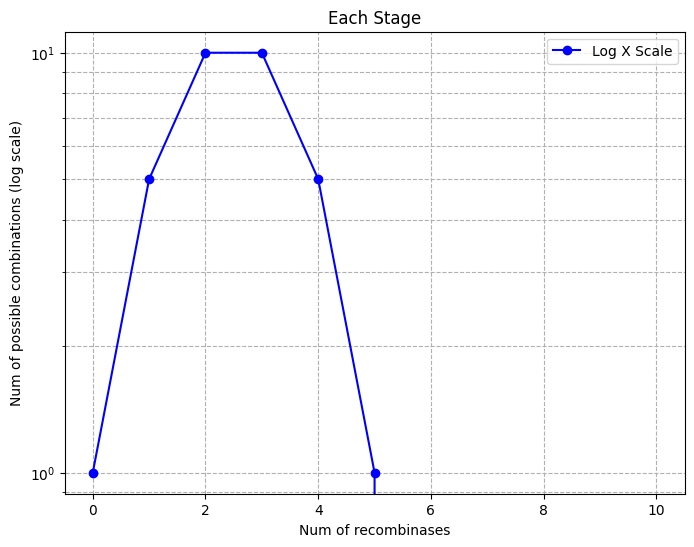

In [81]:
x=[]
y=[]
for i in range(len(outcome_lists)):
    x.append(i)
    if i==0:
        y.append(len(outcome_lists[i]))
    elif i >0:
        y.append(len(outcome_lists[i]))


# Create a figure and axis
plt.figure(figsize=(8, 6))

# Plot the line graph with log scale on the x-axis
plt.semilogy(x, y, marker='o', linestyle='-', color='b', label='Log X Scale')

# (Alternatively, for log y-axis: plt.semilogy(x, y, ...))
# (For both axes log: plt.loglog(x, y, ...))

# Add labels and title
plt.xlabel('Num of recombinases')
plt.ylabel('Num of possible combinations (log scale)')

plt.legend()
plt.grid(True, which="both", ls="--")
plt.title("Each Stage")

plt.show()

In [82]:
import math
def calculate_entropy(prob_dict):
    """
    Calculate Shannon entropy (in bits) for a dictionary of outcome probabilities.
    
    Args:
        prob_dict (dict): Dictionary where keys are outcomes and values are probabilities.
    
    Returns:
        float: Entropy in bits.
    """
    entropy = 0.0
    for prob in prob_dict.values():
        if prob > 0:  # Avoid log(0) which is undefined
            entropy -= prob * math.log2(prob)
    return entropy

[0.0, 1.4575424759098898, 1.370348063335165, 0.8318732745704642, 0.22633099101638593, 0.019586180424926748, 0.0, 0.0, 0.0, 0.0, 0.0]


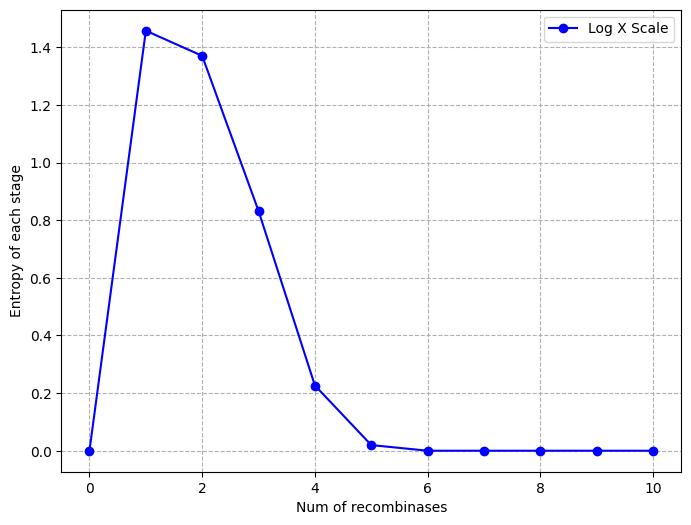

In [83]:
entropy_list=[]
for _ in outcome_lists:
    entropy_list.append(calculate_entropy(_))
print(entropy_list)
    
x=[]
y=[]
for i in range(len(entropy_list)):
    x.append(i)
    y.append(entropy_list[i])


# Create a figure and axis
plt.figure(figsize=(8, 6))

# Plot the line graph with log scale on the x-axis
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Log X Scale')

# (Alternatively, for log y-axis: plt.semilogy(x, y, ...))
# (For both axes log: plt.loglog(x, y, ...))

# Add labels and title
plt.xlabel('Num of recombinases')
plt.ylabel('Entropy of each stage')
plt.title
plt.legend()
plt.grid(True, which="both", ls="--")

plt.show()